In [21]:
import math
import random
from copy import deepcopy
import matplotlib.pyplot as plt
from tqdm import tqdm

random.seed(72)

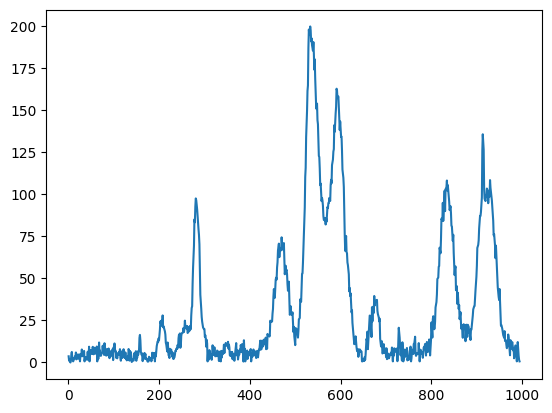

In [35]:
import pandas as pd

df = pd.read_csv('data.csv', sep = ";")

s = df.loc[59, :].values.tolist()[1:]

max_s = max(s)
for i in range(len(s)):
    s[i] *= 200/max_s

x = list(range(1, 995))

plt.plot(x, s)
plt.show()

In [36]:
def g(x, a, b, c):
    if c != 0:
        return a * math.exp(- math.pow(x - b, 2) / (2 * math.pow(c, 2)))
    else:
        return 0

def f(x, params):
    result = 0
    for i in range(len(params)):
        result += g(x, params[i][0], params[i][1], params[i][2])
    return result

def mse(params):
    result = 0
    for i in range(len(x)):
        result += math.pow(s[i] - f(x[i], params), 2)
    return result

def genetic_algorithm(fitness_function, population_size, n_iterations):
    number_of_gaussians = 10
    
    P_CROSSOVER = 0.8
    P_MUTATION = 0.9
    ELITE = 4

    population = []
    max_fit = []
    avg_fit = []
    
    for i in range(population_size):
        individual = []
        for j in range(number_of_gaussians):
            individual.append([random.randrange(0, 200), random.randrange(0, 1000), random.randrange(1, 1000)])
        population.append(individual)

    with tqdm(total=n_iterations) as pbar:
        for k in range(n_iterations):
            population = sorted(population, key=lambda x: fitness_function(x))
            max_fit.append(mse(population[0]))

            # if not (i + 1) % 20: 
            #     avg_pop_fit = 0
            #     for l in range(len(population)):
            #         avg_pop_fit += mse(population[l])
            #     avg_fit.append(avg_pop_fit)
            
            offsprings = []
            offsprings.extend(population[:ELITE])
            for i in range(ELITE, population_size):
                i1 = i2 = i3 = 0
                while i1 == i2 or i2 == i3 or i3 == i1:
                    i1 = random.randint(ELITE, population_size - 1)
                    i2 = random.randint(ELITE, population_size - 1)
                    i3 = random.randint(ELITE, population_size - 1)
                offsprings.append(deepcopy(min(population[i1], population[i2], population[i3], key=lambda x: fitness_function(x))))
        
            for i in range(ELITE, population_size // 2 + ELITE // 2):
                if random.random() < P_CROSSOVER:
                    parent1 = offsprings[i]
                    parent2 = offsprings[i + population_size // 2 - ELITE // 2]
                    for gene in range(len(parent1)):
                        if random.random() < 0.15:
                            parent1[gene], parent2[gene] = parent2[gene], parent1[gene]
            
            for i in range(ELITE, population_size):
                if random.random() < P_MUTATION:
                    for gene in range(len(offsprings[i])):
                        if random.random() < 0.15:
                            offsprings[i][gene] = [random.randrange(0, 200), random.randrange(0, 1000), random.randrange(1, 1000)]
            population = offsprings
            pbar.update(1)
    return population[0], max_fit, avg_fit

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [02:08<00:00,  1.61s/it]


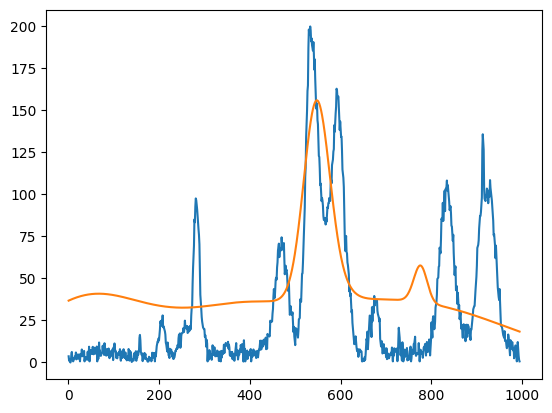

In [38]:
best_ind, max_fit, avg_fit = genetic_algorithm(mse, 100, 80)

fun = []
for xi in x:
    fun.append(f(xi, best_ind))
plt.plot(x, s)
plt.plot(x, fun)
plt.show()

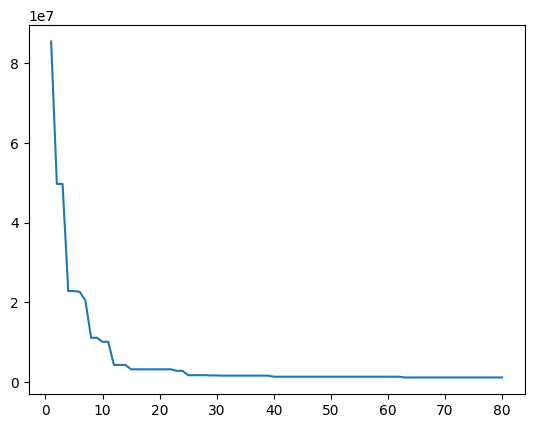

In [41]:
# split = 100
# y1 = list(range(1, split + 1))
# plt.plot(y1, max_fit[:split])
# plt.show()
# y2 = list(range(split + 1, len(max_fit) + 1))
# plt.plot(y2, max_fit[split:])
# plt.show()

y = list(range(1, len(max_fit) + 1))
plt.plot(y, max_fit)
plt.show()

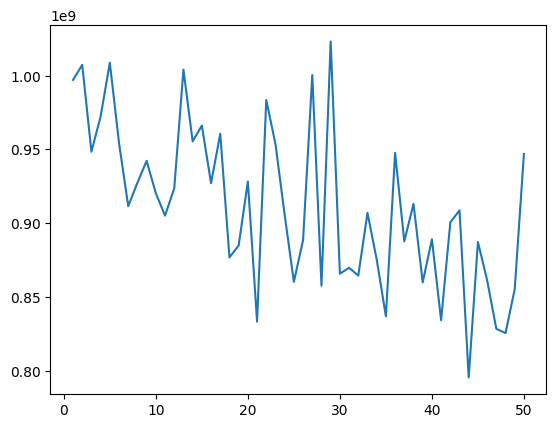

In [136]:
y = list(range(1, len(avg_fit) + 1))
plt.plot(y, avg_fit)
plt.show()

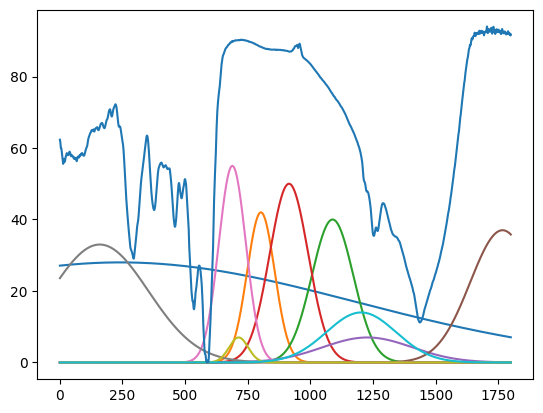

In [141]:
for i in range(len(best_ind)):
    fun = []
    for xi in x:
        fun.append(g(xi, best_ind[i][0], best_ind[i][1], best_ind[i][2]))
    plt.plot(x, fun)
plt.plot(x, s)
plt.show()